# Machine Learning - Football Events
### Project 2

#### Authors : 
* Gustavo Torres, up201706473@fe.up.pt
* Joaquim Rodrigues, up201704844@fe.up.pt
* Miguel Rosa , up201706956@fe.up.pt


## Abstract

This project aims to build predictive machine learning models, with focus on classifiers and apply them to a football dataset, with the use of supervised learning. Machine learning consist in the capability of machines recognize certain patterns in the data with being previously programmed. Predictive models allow to predict the certaing features about the data given an input. Football is a rather random competition where a team can win a match and right after lose against the exact same team in the same conditions. Combining the two of this is this project's objective, combine predictive machine learning models with the randomness of football and it's events, to be able to predict several features of football games and events.



## 1. Introduction

In the context of curricular unit IART, Inteligncia Artificial, of MIEIC, Mestrado Integrado em Informática e Computação, our group were asked to make a project about Machine Learning, being able to choose from several options  where we would like to focus on. The group decision was to work on a classification problem using supervised learning, where the goals is to learn and classify/predict several features about the data, given input features. There was suggestions about the dataset we could work on, and we choose to work in a dataset about football games and its events.

Supervised learning is a major branch of machine learning algorithms, possibly the most used as of the writing of this paper, where the model learns by example and from there it can predict, based on previous seen data, the output of new data. During the training the models is fed with input data and its associated output, learning and identifying complex patterns in the data and to what output it maps to, so it can predict unseen data.

Supervised learning can be divided into 2 categories: classification and regression. This paper focus majorly in classification where the models tries to correctly identify to which class/category the data maps to. One of the most used approches to classification consists od binary data, whether a feature is true or not, for example, whether a shoot is goal or not. In this paper, several classifier models are used, with particular emphasis on K-Nearest Neighbors, Suport Vector Machines, Random Forest Classifiers and Neural Networks. In regression the models tries to map the feature in a continuos space, and can be used to predict quantities or used in statistics.

The dataset choosen is about football because it is a theme our group is interested on and would make our analysis more meaningful. Football is possibly the most popular sport around the world and like many sports, it is inherently random, its result are very unpredictable and so its events, which make the sport so interesting to so many around the world, nevertheless it is the sport the most people bet on.

Firstly, an exploratory dataset analysis, including class distribuion, values range and class analysis, was made in order to know the information avaialble and get familiar with the data we would work on and to identify possible problems where we could apply supervised learning and predict features from the dataset.

After the problems have been choosen, a data preprocessing was made in order to select meaning and useful features for the problem we were trying to predict, from handling NULL values, standardizing data and even creating new tables to hold new processed information (data transform). Now it was possible to train our classifier models and compare its result against the test data, using several metrics and erros.

Finally graphs and tables were made to support the results and compare the models.


## 2. Dataset

The dataset choosen is about football games and its events, and can be accesed [here](https://www.kaggle.com/secareanualin/football-events). It is hard to find a good database about football games and event, containg so many and so detailed information. The information was parsed using a regex from the description of the event resulting in a total 18 features about each game and 22 about each event. Some features are dependent on other features so they only have a value associated dependeding on the value of other features, for exemple, the shot_outcome only has a value when the event_type is an attemp (value  = 1), otherwise it is NULL.

The dataset consisting of a total of 10112 games and 941009 events, during 5 years, from the season 2011/2012 to 2016/2017 of the 5 major european leagues, England, Spain, France, Germany, Italy.

There are two files, one with each of the available games, and other one with each of the major events of the previous games. Each game has a unique identifier that is shared with each event of that game, making it possible to map an event to a game and even joing data as needed.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import copy

%matplotlib inline

#load data from files
events = pd.read_csv('./data/' + 'events.csv')
ginf = pd.read_csv('./data/' + 'ginf.csv')

In [2]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

The events info consists of the following fields:
* id_odsp - unique id of game of event
* id_event - unique id of the event
* sort_order - choronological order of event in the game
* time - minute of event
* text - description of event
* event_type - primary event(
0	Announcement
1	Attempt
2	Corner
3	Foul
4	Yellow card
5	Second yellow card
6	Red card
7	Substitution
8	Free kick won
9	Offside
10	Hand ball
11	Penalty conceded)
* event_type2 - secundary event
(12 - Key Pass
13 - Failed through ball
14-Sending off
15-Own goal)
* side - side of event
(1	Home
2	Away)
* event_team - team that produced the event
* oponnent - team that the event team played against
* player - name of player involved in event
* player2 - name of player involved in secundary event
* player_in - player that came in (only in substitutions)
* player_out - player that came ot (only in substitutions)
* shot_place - location of the shot
(1	Bit too high
2	Blocked
3	Bottom left corner
4	Bottom right corner
5	Centre of the goal
6	High and wide
7	Hits the bar
8	Misses to the left
9	Misses to the right
10	Too high
11	Top centre of the goal
12	Top left corner
13	Top right corner)
* shot_outcome - possible shot outcome
(1	On target
2	Off target
3	Blocked
4	Hit the bar)
* is_goal - whether if is goal or not
* location - location of where the event happened
(1	Attacking half
2	Defensive half
3	Centre of the box
4	Left wing
5	Right wing
6	Difficult angle and long range
7	Difficult angle on the left
8	Difficult angle on the right
9	Left side of the box
10	Left side of the six yard box
11	Right side of the box
12	Right side of the six yard box
13	Very close range
14	Penalty spot
15	Outside the box
16	Long range
17	More than 35 yards
18	More than 40 yards
19	Not recorded)
* bodypart - bodypart of event
(1	right foot
2	left foot
3	head)
* assist_method - in case of asisted shot
(0	None
1	Pass
2	Cross
3	Headed pass
4	Through ball)
* situation - situation of event
(1	Open play
2	Set piece
3	Corner
4	Free kick)
* fast_break - whether it was a fast break or not

In [3]:
ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.1+ MB


The games info consists of the following fields:
* id_odsp - unique id of game
* link_odsp - link to oddsportal page
* adv_stats - whether the game has adveanced stats or not
* data - date of game
* league - club league
* season - year of the game
* country - host of league
* ht - home team
* at - awat team
* fthg - full time home goals
* ftag - full time away goals
* odd_h - odd of home team winning
* odd_d - odd of draw
* odd_a - odd of away team winning
* odd_over - odd of over 2.5 total goals
* odd_under - odd of under 2.5 total goals
* odd_bts - odd of both teams scoring
* odd_bts_n - odd of both teams not to score

Keep in mind that the odds represent the highest odds in the market.

In [4]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

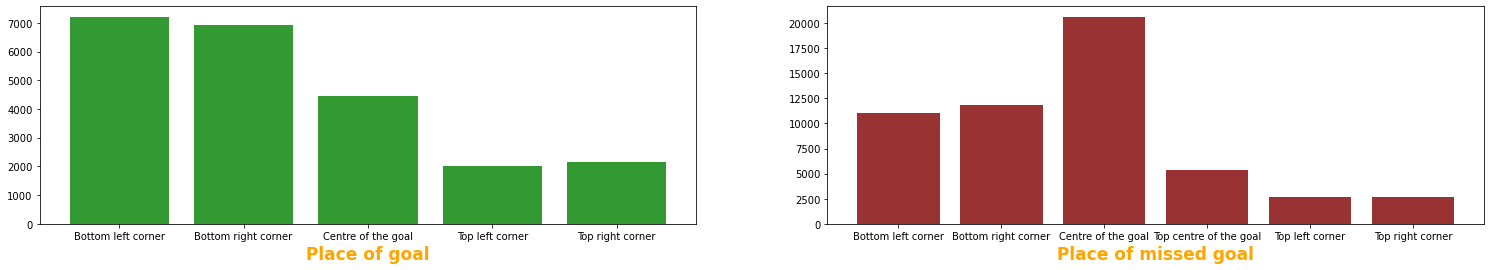

In [5]:
## Shot place goals
g_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 6)]])
## Shot place not goals
ng_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 7)]])

on_target_attemps = events[(events.event_type == 1) & (events.shot_outcome == 1)]
goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()
not_goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()

plt.figure(figsize=(40, 4))
plt.subplot(131)
plt.bar(g_shot_place, goal_shot_places.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Place of goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(ng_shot_place, not_goal_shot_places.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Place of missed goal',fontweight='bold', color = 'orange', fontsize='17')
del g_shot_place
del ng_shot_place
del goal_shot_places
del not_goal_shot_places

We can clearly see that we lower corners are the places where more frequent end in goals, whereas, the center ends up in a miss more often, maybe because the goalkeeper positions himself in the center, to is easier to stay there and harder to reach the corners, however the top corners are much easier to miss than the lower, so player bet on the lower ones.

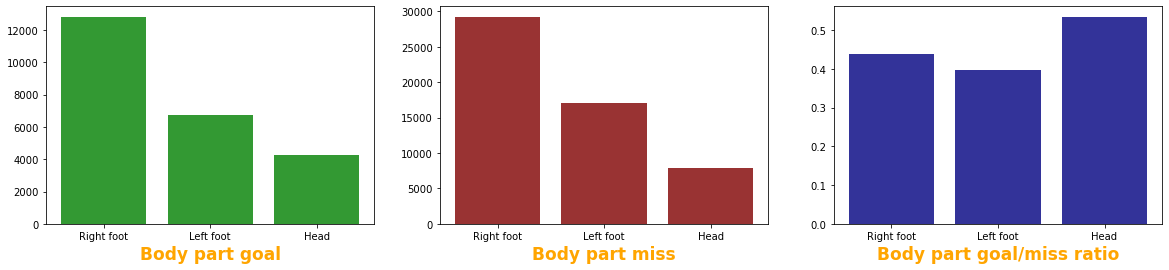

In [6]:
bodypart = pd.Series(['Right foot','Left foot','Head'], index=[[item for item in range(1, 4)]])
goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
not_goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
goal_bodypart/not_goal_bodypart

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.bar(bodypart, goal_bodypart.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Body part goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(bodypart, not_goal_bodypart.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Body part miss',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(133)
plt.bar(bodypart, (goal_bodypart/not_goal_bodypart).ravel(),color=(0.2,0.2,0.6,1))
plt.xlabel('Body part goal/miss ratio',fontweight='bold', color = 'orange', fontsize='17')
del goal_bodypart
del bodypart
del not_goal_bodypart
del on_target_attemps

Here we compare tha attemps of goal that were on target, meaning that there was no intersection from the other teams players and the shoot went to the target. 
With this data we can conclude that most players are right foot, because is the most used foot in the dataset. Attemps with head are the less frequent, maybe because is easier to play football at ground level than do an assist for the head, however we can cleary see in the last graph that Head is the most effective bodypart when attempting to score a goal, with an effectiveness greater than 50%.

In [7]:
leagues = pd.Series(['Bundesliga' , 'Premier League' , 'League 1', ' Serie A' , 'La Liga'], index=[[item for item in range(1, 6)]])
merge = events.merge(ginf, how="left");

games_per_league = ginf.groupby('league')['league'].count()
fouls_per_league = merge[(merge.event_type == 3)].groupby('league')['league'].count()
fouls_per_game_per_league = fouls_per_league/games_per_league
del fouls_per_league
cards_per_league = merge[(merge.event_type == 4) |(merge.event_type == 5) | (merge.event_type == 6)].groupby('league')['league'].count()
cards_per_game_per_league = cards_per_league/games_per_league
del cards_per_league

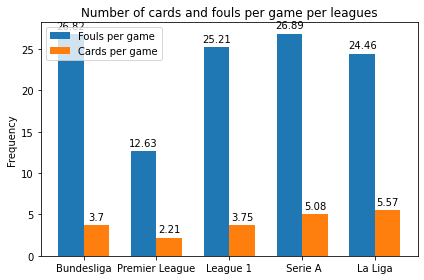

In [8]:

x = np.arange(len(leagues))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fouls_per_game_per_league, width , label='Fouls per game')
rects2 = ax.bar(x + width/2, cards_per_game_per_league, width, label='Cards per game')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Number of cards and fouls per game per leagues')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
#delete
del fouls_per_game_per_league
del cards_per_game_per_league

As we can see, Premier League is where less fouls happen, maybe because player avoid physical contact or the referee is less likely to mark a foul. However we can the that La Liga is the second least place where fouls happen, however is where the most cards are given.

[0 1 2 3 4]


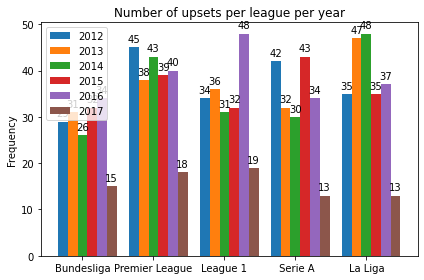

In [9]:
seasons = ['2012' , '2013' , '2014' , '2015' , '2016' , '2017'];

upsets = ginf[((ginf.fthg > ginf.ftag) & (ginf.odd_h/ginf.odd_a > 1.8)) | ((ginf.fthg < ginf.ftag) & (ginf.odd_a/ginf.odd_h > 1.8))]

upsets_both = ginf[(((ginf.fthg == 0) | (ginf.ftag == 0)) & (ginf.odd_bts_n/ginf.odd_bts > 1.2))]

x = np.arange(len(leagues))  # the label locations
print(x)
width = 0.55  # the width of the bars

fig, ax = plt.subplots()

i = 0
for season in seasons:
    upsets_per_season_per_league = upsets[upsets.season == int(season)].groupby('league')['league'].count()
    rects = ax.bar(x - width/2 + i*width/len(season) , upsets_per_season_per_league, width / len(season), label=season)
    autolabel(rects)
    i = i + 1
    
    
ax.set_ylabel('Frequency')
ax.set_title('Number of upsets per league per year')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

fig.tight_layout()

plt.show()
del upsets

Upset is when a team is likely to lose the game, however it win, also called the 'underdog team', it also represents the unexpected wins and shows the randomness of the sport. We can see that Bundsliga is less likely to have an upset, and Premier League has the most upsets, and can be interpreted as the most fair league, where there are least differences between teams.

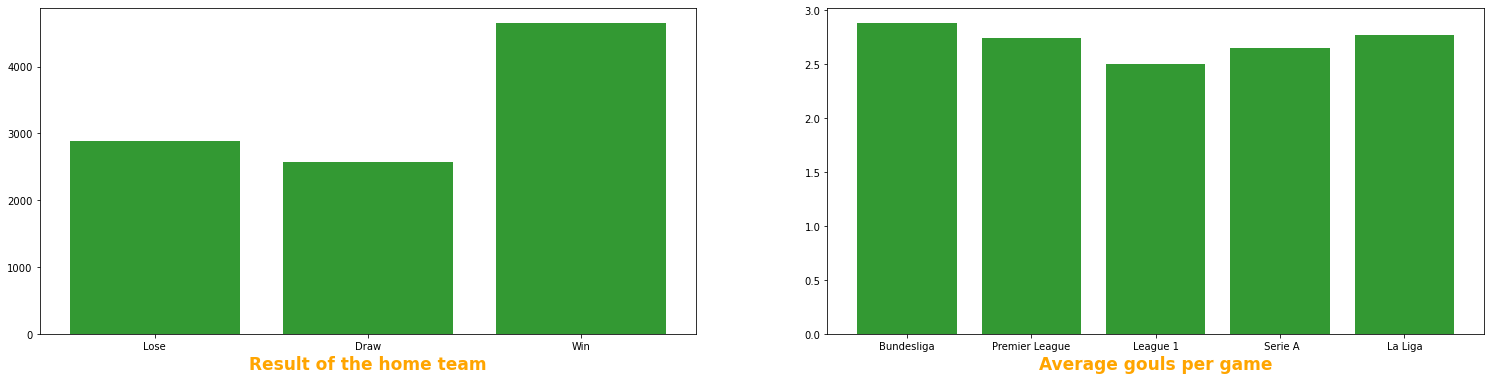

In [10]:
ginf_extra = ginf.copy()
ginf_extra['dif'] = ginf_extra['fthg'] - ginf_extra['ftag']
ginf_extra['total'] = ginf_extra['fthg'] + ginf_extra['ftag']

conditions = [ginf_extra['dif'] > 0 , ginf_extra['dif'] == 0, ginf_extra['dif'] < 0]
choices = [1 , 0 , -1]
ginf_extra['result'] = np.select(conditions,choices,default=np.nan)
homeResult = ginf_extra.groupby('result')['result'].count()

gouls_per_league_per_game = ginf_extra[['total','league']].groupby('league')['total'].sum()/games_per_league

results = ['Lose' , 'Draw' , 'Win']

plt.figure(figsize=(40, 6))
plt.subplot(131)
plt.bar(results, homeResult.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Result of the home team',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(leagues, gouls_per_league_per_game.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Average gouls per game',fontweight='bold', color = 'orange', fontsize='17')

del ginf_extra
del homeResult
del gouls_per_league_per_game

Here, on the first graph, we can see the 'home team' factor where a team is more likely to win when playing at home, and we can see the number is significantly higher.
On the second one, we see that the average goals per game a little higher than 2.5, which is why there is interest in knowing whether a game will have 3 or more goals, or less than 3. Bundesliga has the highest goals per game, and Luague 1, the least.

In [11]:
shots = events[events.event_type == 1]

In [12]:
most_offensive_player = shots.groupby('player')['player'].count().sort_values(ascending = False)[:5]
most_scoring_player = shots[shots.is_goal == 1].groupby('player')['player'].count().where(lambda x : x>60).dropna().sort_values(ascending = False)
most_effective_player = (most_scoring_player/most_offensive_player.dropna()).sort_values(ascending = False)[:5]
del shots

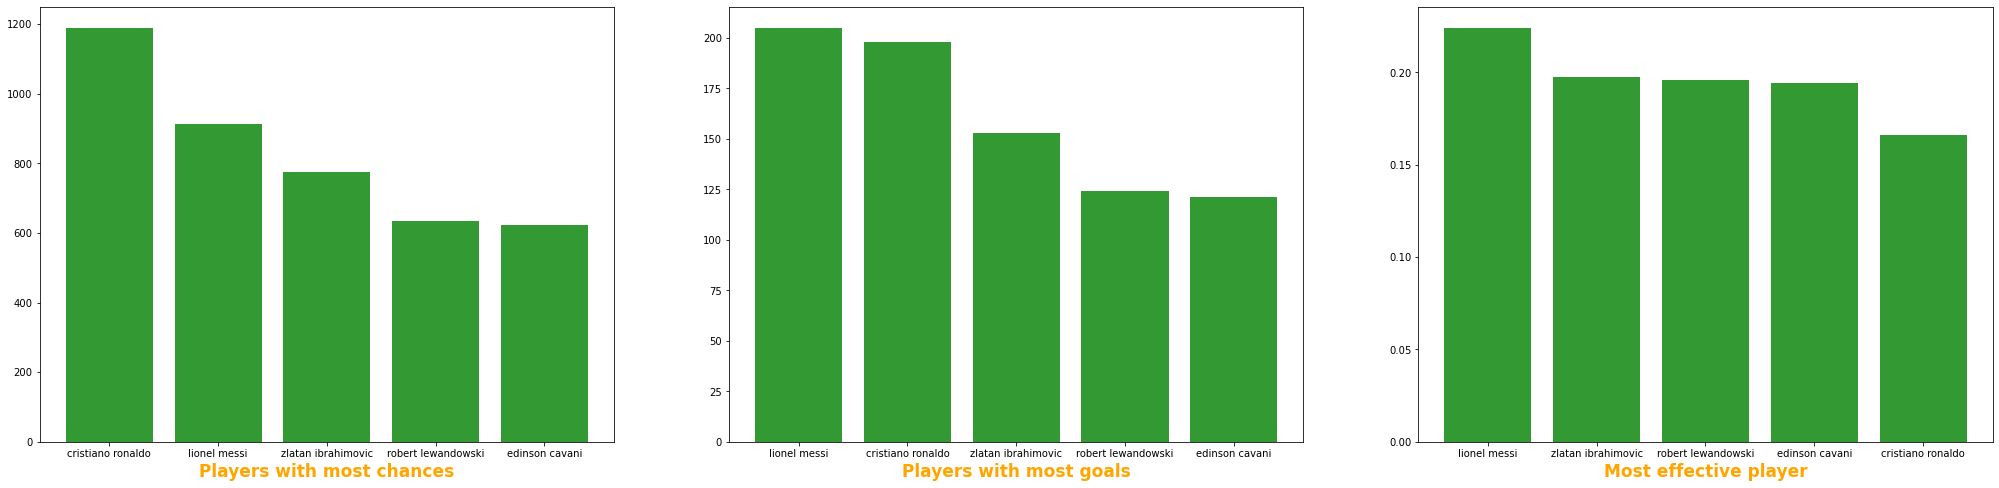

In [13]:

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(most_offensive_player.index.values, most_offensive_player.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Players with most chances',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(most_scoring_player[:5].index.values, most_scoring_player[:5].ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Players with most goals',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(133)
plt.bar(most_effective_player.index.values, most_effective_player.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Most effective player',fontweight='bold', color = 'orange', fontsize='17')

del most_offensive_player
del most_scoring_player
del most_effective_player

In here we can compare 5 offensive players with the highest stats in the offensive side. Cristiano Ronaldo is the player that had the most opportunities however in the one least sucessful in converting them into goals, in terms of ratio. Lionel Messi had less changes than Ronaldo, however scored more goals, making him the most effective player.

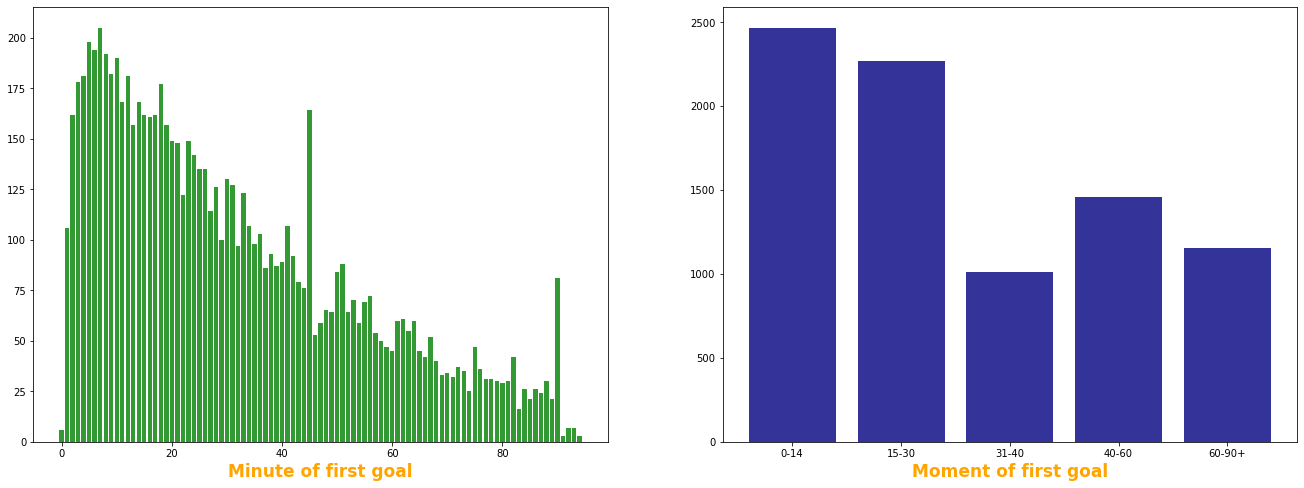

In [14]:
goals = events[(events.is_goal == 1)]
moments = goals.groupby("id_odsp").first()[['time']]
moments1 = moments.groupby("time")['time'].count()

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(moments1.index.values, moments1.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Minute of first goal',fontweight='bold', color = 'orange', fontsize='17')

col = 'time'
conditions = [moments[col] < 15 , moments[col] <=30 , moments[col] <=40 , moments[col] <=60 , moments[col] > 60]
choices = [1 , 2 , 3, 4 , 5]
moments['time_moment'] = np.select(conditions,choices,default=np.nan)
moments = moments[['time_moment']].groupby("time_moment")['time_moment'].count()
moments

plt.subplot(132)
plt.bar(['0-14','15-30','31-40','40-60','60-90+'], moments.ravel(),color=(0.2,0.2,0.6,1))
plt.xlabel('Moment of first goal',fontweight='bold', color = 'orange', fontsize='17')
del moments1
del moments

Here we can see the minute of the first goal and to which interval it maps ('0-14','15-30','31-40','40-60','60-90+').
The first goal is more likely in the first minutes and tends to decrease along the macth.

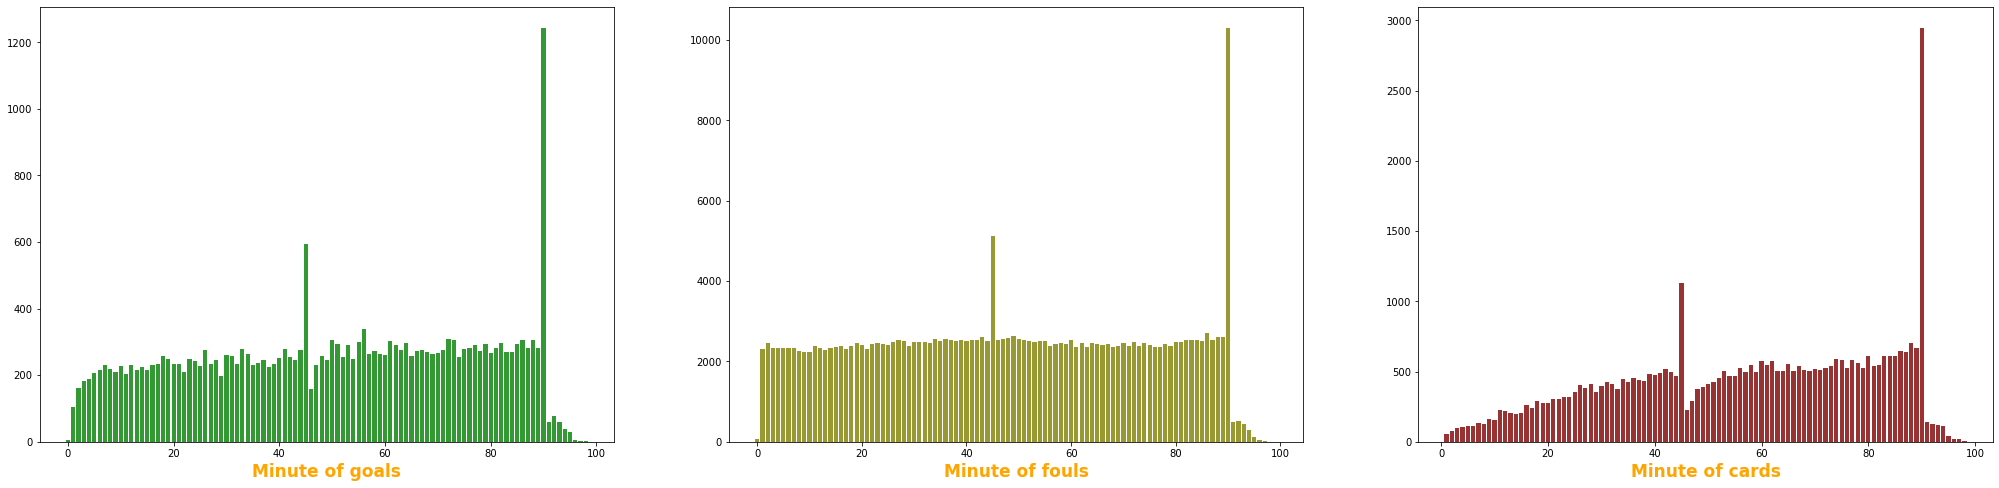

In [15]:
goals_minute = goals.groupby("time")['time'].count()

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(goals_minute.index.values, goals_minute.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Minute of goals',fontweight='bold', color = 'orange', fontsize='17')

fouls = events[events.event_type == 3]
fouls_minute = fouls.groupby("time")['time'].count()

plt.subplot(132)
plt.bar(fouls_minute.index.values, fouls_minute.ravel(),color=(0.6,0.6,0.2,1))
plt.xlabel('Minute of fouls',fontweight='bold', color = 'orange', fontsize='17')

cards = events[(events.event_type == 4) | (events.event_type == 5) | (events.event_type == 6)]
cards_minute = cards.groupby("time")['time'].count()

plt.subplot(133)
plt.bar(cards_minute.index.values, cards_minute.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Minute of cards',fontweight='bold', color = 'orange', fontsize='17')

del fouls
del goals_minute
del cards_minute
del cards
del fouls_minute
del goals
del merge

In this section we compare the minutes of the goals, fouls and cards. The spike in 45 and 90 can be explained because some goals happen in the compensation time and are not counted as 90+5 or 95, but as 90. We can see that the frequency of events tends to increased as the game procceds, but not exactly in the cards event. In the card events, there is a decrease after muinute 45. As before a card, a foul has to happen and the fouls remain as a line, whether the refeere is lees likely to give a card right after 45 or the player do not make agressive fouls that result in cards.

After an analysis over the dataset and an acknowkledge of the distribution, meaning and relations of its features has been done, the group decided to look with more detail into de following predictive problems:
* Predict the winning team
* Predict the moment of the first goal
* Predict whether both teams score
* Predict whether there will be more or less than 2.5 goals
* Predict whether an attemp will result in a save

These problems were choosen because ofthe existence of data and features alligned with the problem we are trying to build a model and predict and because of its meaning. The first 4 problems are classical betting options, where many people bet in these options. The last two problems rely on the prediction of whether an attemp will result in goal or not, also known as Expected Goals Model, or whether an attemp will result in a save or not, based in the previous model, allowing then to further data analysis about players and teams.

## 3. Problems

In this section it will be discussed the approach to each of the problems mentioned previously and an evaluation of the results obtain. There is a different approach to each of these problems given that they predict different features and different data can be extracted from each problem, which will be discussed. Several models were compared in order to find the one that fits better to a given problem.

In [16]:
#import necessary libraries
import pandas as pd
import numpy as np

from sklearn import preprocessing

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,recall_score,precision_score, f1_score

In [17]:
#definition of useful methods
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def checkClf(name,clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    #auc_roc = roc_auc_score(y_test, y_pred[:,1])
    #print('Our MLP classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print("\n")

### 3.1 Predict the winning team

This problem is possibly the most known problem in any sports because it would be very valuable to know who the winner would be in a given match, whether for betting or for investimens, and so on. It is the most bet option because of its simplicity, only three simple options (Win, Draw, Lose) and meaning to thoose who bet. However it's results are very unpredictable and some would argue that they have some randomness associated, there are so many internal and external factors to take into account and even then no predictor would accurtly predict every game. A team that has won a game can, right after, in the next game, in the same stadium, against the same team, loose that game.

#### Approach

For this problem tha dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. 
There are two necessary input features for this problem, the home team and the away team, in order to be able to predict who will win.
The output feature will be in order to the home team, representing the result of the home team, a Win means that the home team won, a Lose means that the home team lost. For this representation the output (Win, Draw,Lose) will be transformed into (1,0,-1), because it will be usefull for future use.

In [18]:
games = ginf[['ht','at','fthg','ftag']].copy()
games['result'] = games['fthg'] - games['ftag']

col = 'result'
conditions = [games[col] > 0 , games[col] == 0, games[col] < 0]
choices = [1 , 0 , -1]
games['result'] = np.select(conditions,choices,default=np.nan)
games.head()

,ht,at,fthg,ftag,result
0,Borussia Dortmund,Hamburg SV,3,1,1.0
1,FC Augsburg,SC Freiburg,2,2,0.0
2,Werder Bremen,Kaiserslautern,2,0,1.0
3,Paris Saint-Germain,Lorient,0,1,-1.0
4,Caen,Valenciennes,1,0,1.0


For an initial approach we will only take into account the home team and away team.
As we can see the **ht** and **at** features are categorical, so we need to convert them to binary dummies.

In [19]:
games = games[['ht','at','result']]
games_dummies = pd.get_dummies(games, columns=['ht','at'])
games_dummies.head()
del games

As we can see we end up to a total of 295 columns as part of the input and one for the output.
Next we will split the data into the training one and the test one, so we can train our model.

In [20]:
X = games_dummies.iloc[:,1:]
y = games_dummies.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
X_train

del games_dummies

(10112, 295)
(10112,)


For training and tunning our models we will GridSearchCV, which will conduct an exaustive search over the hiperparameters and options specified, in order to find the best that fit our data.

In [21]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 1000) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print("\n")
    
del models

KeyboardInterrupt: 

The KNN model had the best accuracy, however it is not worth to dig into details because as we can see the previous data has very little features, only the teams that were playing against each other, so maybe with more input data our model can understand the data better and thus make better predictions. One important feature to join is the season, almost any team keeps its formation from 2011/2012 until 2016/2017, there player trades, the player improve or decline and even the coach changes, so adding the season can lead to result improvements. Furthermore, we have acess to the odds for each possible outcome before each match, odds take into account external factors that we don't have access, so it might be profitable to include that into our data set. We also include de performance of each team, suming the total of results (1 for win, 0 for draw and -1 for lo) in the sort term and long term at home and away (3 and 10 games respectively)

In [83]:
games_2 = ginf[['date','ht','at','fthg','ftag','season','odd_h','odd_d','odd_a']].copy()
games_2['result'] = games_2['fthg'] - games_2['ftag']

col = 'result'
conditions = [games_2[col] > 0 , games_2[col] == 0, games_2[col] < 0]
choices = [1 , 0 , -1]
games_2['result'] = np.select(conditions,choices,default=np.nan)

games_2['form1_short'] = games_2.apply (lambda row: 
                                      games_2[( ( (games_2['ht'] == row['ht']))
                                                 & (games_2['date'] < row['date']))].iloc[-3:]['result'].sum()
                                      -
                                      games_2[( ( (games_2['at'] == row['ht']))
                                                 & (games_2['date'] < row['date']))].iloc[-3:]['result'].sum()
                                      , axis=1)
games_2['form2_short'] = games_2.apply (lambda row: 
                                      -games_2[( ( (games_2['at'] == row['at']))
                                                 & (games_2['date'] < row['date']))].iloc[-3:]['result'].sum()
                                      +
                                      games_2[( ( (games_2['ht'] == row['at']))
                                                 & (games_2['date'] < row['date']))].iloc[-3:]['result'].sum()
                                      , axis=1)
games_2['form1_long'] = games_2.apply (lambda row: 
                                      games_2[( ( (games_2['ht'] == row['ht']))
                                                 & (games_2['date'] < row['date']))].iloc[-10:]['result'].sum()
                                      -
                                      games_2[( ( (games_2['at'] == row['ht']))
                                                 & (games_2['date'] < row['date']))].iloc[-10:]['result'].sum()
                                      , axis=1)
games_2['form2_long'] = games_2.apply (lambda row: 
                                      -games_2[( ( (games_2['at'] == row['at']))
                                                 & (games_2['date'] < row['date']))].iloc[-10:]['result'].sum()
                                      +
                                      games_2[( ( (games_2['ht'] == row['at']))
                                                 & (games_2['date'] < row['date']))].iloc[-10:]['result'].sum()
                                      , axis=1)

games_dummies_2 = pd.DataFrame();
games_dummies_2['result'] = 0
for i, j in games_2.iterrows(): 
    if j['ht'] not in games_dummies_2.columns:
        games_dummies_2[j['ht']] = 0
    if j['at'] not in games_dummies_2.columns:
        games_dummies_2[j['at']] = 0
    if j['season'] not in games_dummies_2.columns:
        games_dummies_2[j['season']] = 0
    games_dummies_2 = games_dummies_2.append({'result': j['result'], j['season']: 1, j['ht'] : 1 , 
                        j['at']: -1, 'form1_short' : j['form1_short'],'form2_short' : j['form2_short']
                       , 'form1_long' : j['form1_long'],'form2_long' : j['form2_long']
                       ,'odd_h' : j['odd_h'], 'odd_d' : j['odd_d'] , 'odd_a' : j['odd_a']}, ignore_index=True)


games_dummies_2 = games_dummies_2.replace(np.nan, 0)

#games_2 = games_2[['ht','at','result','season','odd_h','odd_d','odd_a','form1_short','form2_short','form1_long','form2_long']]
#games_dummies_2 = pd.get_dummies(games_2, columns=['ht','at'])
X = games_dummies_2.iloc[:,1:]
y = games_dummies_2.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
y

del games_dummies_2
del games_2
X_train

(10112, 161)
(10112,)


,Borussia Dortmund,Hamburg SV,2012,form1_long,form1_short,form2_long,form2_short,odd_a,odd_d,odd_h,...,FC Ingolstadt 04,Las Palmas,Frosinone,Carpi,2017,Middlesbrough,Alaves,Crotone,Leganes,RB Leipzig
4786,0.0,0.0,0.0,10.0,3.0,4.0,1.0,3.40,3.40,2.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,0.0,0.0,1.0,-1.0,-6.0,-2.0,4.22,3.50,2.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.0,0.0,1.0,-1.0,-1.0,4.0,4.0,2.24,3.25,4.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5152,0.0,1.0,0.0,-7.0,-2.0,-1.0,-2.0,2.25,3.95,3.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5204,0.0,0.0,0.0,5.0,4.0,-4.0,-1.0,6.90,4.10,1.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0.0,-1.0,0.0,11.0,3.0,-4.0,0.0,5.70,4.40,1.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7535,0.0,0.0,0.0,-4.0,1.0,6.0,2.0,2.52,3.42,3.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6043,0.0,0.0,0.0,-4.0,-4.0,-5.0,-3.0,5.10,3.48,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7408,0.0,0.0,0.0,-1.0,-2.0,-7.0,1.0,4.25,3.65,2.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 800) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")

del models

For this next step, even though the Neural Network had a better accuracy it tent to overfit ignoring the least frequent output (draw), and had worse R2 and and square error. So we will choose the Suport Vector Machine and the KNeighbors for further comparision.

KeyboardInterrupt: 

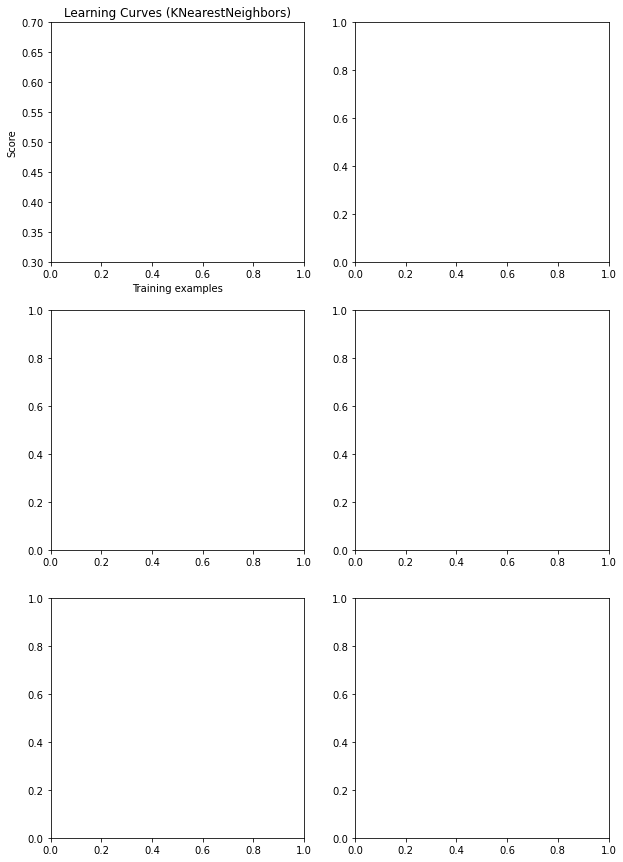

In [90]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNearestNeighbors)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator1 = KNeighborsClassifier(n_neighbors = 101)
plot_learning_curve(estimator1, title, X, y, axes=axes[:, 0], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator2 = svm.SVC(kernel = 'linear',probability=True)
plot_learning_curve(estimator2, title, X, y, axes=axes[:, 1], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

plt.show()

As we can see the KNearestNeighbors behaved better in the overall dataset. And the SVN had the abilty to perform better given more data, however fot predicting the winning team we will stick with the KNN model that gave us, previously, a  52,852 % accuracy, which we agree is a decent score, given that the outcome is very random, and it is hard to train the model with data that has inherently noise.

In [91]:
estimator1.fit(X_train,y_train)
y_pred1 = estimator1.predict(X_test)
y_pred1_prob = estimator1.predict_proba(X_test)
data1 = X_test.copy()
data1['result_prediction'] = y_pred1;
data1['result_prediction_lost'] = pd.DataFrame(y_pred1_prob[0:,0]).iloc[:,0].values
data1['result_prediction_draw'] = pd.DataFrame(y_pred1_prob[0:,1]).iloc[:,0].values
data1['result_prediction_win'] = pd.DataFrame(y_pred1_prob[0:,2]).iloc[:,0].values
data1['actual_result'] = y_test;

estimator2.fit(X_train,y_train)
y_pred2 = estimator2.predict(X_test)
y_pred2_prob = estimator2.predict_proba(X_test)
data2 = X_test.copy()
data2['result_prediction'] = y_pred2;
data2['result_prediction_lost'] = pd.DataFrame(y_pred2_prob[0:,0]).iloc[:,0].values
data2['result_prediction_draw'] = pd.DataFrame(y_pred2_prob[0:,1]).iloc[:,0].values
data2['result_prediction_win'] = pd.DataFrame(y_pred2_prob[0:,2]).iloc[:,0].values
data2['actual_result'] = y_test;

KeyboardInterrupt: 

In [97]:
threshold = 0.57
conditions = [((data1['result_prediction'] != data1['actual_result']) & (((data1['result_prediction'] == 1) & (data1['result_prediction_win'] >= threshold)) | ((data1['result_prediction'] == 0) & (data1['result_prediction_draw'] >= threshold))|((data1['result_prediction'] == -1) & (data1['result_prediction_lost'] >= threshold))) ),
              (data1['result_prediction'] == -1) & (data1['result_prediction_lost'] < threshold) ,
              (data1['result_prediction'] == -1) & (data1['result_prediction_lost'] >= threshold),
              (data1['result_prediction'] == 0) & (data1['result_prediction_draw'] < threshold) ,
              (data1['result_prediction'] == 0) & (data1['result_prediction_draw'] >= threshold),
              (data1['result_prediction'] == 1) & (data1['result_prediction_win'] < threshold) ,
              (data1['result_prediction'] == 1) & (data1['result_prediction_win'] >= threshold)]
choices = [-1 ,0, -1 + data1['odd_a'] ,0, -1 + data1['odd_d'],0, -1 + data1['odd_h']]
data1['balance'] = np.select(conditions,choices,default=np.nan)

threshold = 0.4
conditions = [((data2['result_prediction'] != data2['actual_result']) & (((data2['result_prediction'] == 1) & (data2['result_prediction_win'] >= threshold)) | ((data2['result_prediction'] == 0) & (data2['result_prediction_draw'] >= threshold))|((data2['result_prediction'] == -1) & (data2['result_prediction_lost'] >= threshold))) ),
              (data2['result_prediction'] == -1) & (data2['result_prediction_lost'] < threshold) ,
              (data2['result_prediction'] == -1) & (data2['result_prediction_lost'] >= threshold),
              (data2['result_prediction'] == 0) & (data2['result_prediction_draw'] < threshold) ,
              (data2['result_prediction'] == 0) & (data2['result_prediction_draw'] >= threshold),
              (data2['result_prediction'] == 1) & (data2['result_prediction_win'] < threshold) ,
              (data2['result_prediction'] == 1) & (data2['result_prediction_win'] >= threshold)]
choices = [-1 ,0, -1 + data2['odd_a'] ,0, -1 + data2['odd_d'],0, -1 + data2['odd_h']]
data2['balance'] = np.select(conditions,choices,default=np.nan)

However no person bets in every single game and selects a few, the ones that the person is most confident about, so for this problem, our predictors choose the games whose prediction it was more than 40% sure for KNN and more than 35 for SVM of the result, leading to the following results.

In [98]:
print('KNN balance: {:.2f} €'.format(data1['balance'].sum()))
print('SVM balance: {:.2f} €'.format(data2['balance'].sum()))

KNN balance: 106.14 €
SVM balance: 150.87 €


### 3.2 Predict the moment of first goal

This problem consists of determining the moment of the first goal, which is also a rather random event because nothing but events during the game can help to determine when a goal will happen, like the number of previous attemps, how many players are in the field, but all this occurs during the game and we cannot know before hand, but even if we knew that, it is subject of luck and chance.

#### Approach

For this problem we will use the home team and the away team because more offensive or better teams are more likely to score sonner agains less defensive or weaker teams, to help clarify that and take into account external factors, the odds each possible outcome of the game (Win, Draw, Lose) will also be added.

In [ ]:
goals = events[(events.is_goal == 1)]
moments = goals.merge(ginf, how="left").groupby("id_odsp").first()[['time','ht','at','side','odd_h','odd_d','odd_a']]
moments.head()

Next, the time will be divided into 4 categories, the first moment, from the beggining of the game until the end of the minute 24, from the minute 25 to the end of the first half will be the second moment, the third moment will be from the beggining o the second half until the minute 60, and form then on it will be the fourth moment.

In [ ]:
col = 'time'
conditions = [moments[col] < 15 , moments[col] <=30 , moments[col] <=40 , moments[col] <=60 , moments[col] > 60]
choices = [1 , 2 , 3, 4 , 5]
moments['time_moment'] = np.select(conditions,choices,default=np.nan)
moments = moments[['time_moment','ht','at','odd_h','odd_d','odd_a']]
moments

Next we will turn our categorical data into binary dummies, so our models can understand them.

In [ ]:

moments_dummies_2 = pd.get_dummies(moments, columns=['ht','at'])
X = moments_dummies_2.iloc[:,1:]
y = moments_dummies_2.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)

del moments_dummies_2
del moments

In this section several classifiers will be tested with several hyperparameters in order to find the best one. It was not possible to do a training with Grid Search with Cross Validation because of the time complexety associated and the group decided to take more manual approach that gave us the following results.

In [ ]:
checkClf('KNN_21',KNeighborsClassifier(n_neighbors=21))
checkClf('KNN_25',KNeighborsClassifier(n_neighbors=25))
checkClf('KNN_31',KNeighborsClassifier(n_neighbors=31))
checkClf('KNN_35',KNeighborsClassifier(n_neighbors=35))
checkClf('SVC' , svm.SVC(gamma = 'scale', kernel = 'rbf'))
checkClf('RFC_5' , RandomForestClassifier(n_estimators=5))
checkClf('RFC_10' , RandomForestClassifier(n_estimators=10))
checkClf('RFC_20' , RandomForestClassifier(n_estimators=20))
checkClf('MLP' , MLPClassifier(max_iter = 4000,solver='sgd',hidden_layer_sizes=(10,5,5,5,5)))
checkClf('CNB' , CategoricalNB())

From the previous data we can see that Support Vector Machine had a better accuracy, however it was overfit and and could only predict the most frequent moment, the first one, thus it had a worse f1 score over all the categories, so we choose the KNeighbors with 35 neighbors and the Random Forest with 10 estimators for further comparisons, because they show good f1 measure and do not overfit into one category.

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNeighborsClassifier, n_neighbors=31)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=31)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.2, 0.4),
                    cv=cv, n_jobs=4)

title = "Learning Curves (RandomForesClassifier, estimators = 10)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators=10)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.1, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

The Random Forest Classifier rapidly overfits to the training data, existing a huge difference between the training score (very high) and the cross-validation score (rather low), whereas the KNieighbours has a much smaller difference and achieves a higher CV-score, so for this models we will stick with KNeighbors.

### 3.3 Predict whether both teams score
In this problem we will try to predict whether both score at least a goal during the entire game. This event is more likely the more agressive and less defensive the both teams are, leading to higher chances of goals from the both teams. However, a team can score many goals in one game and right in the next do not score at all.
#### Approach

There are two principal input features, the home team and the away team. To complement this feature we will be adding the odd for both teams to score and for both teams to score, which reflect the previsions of people betting and takes into account external factors. Furthermore, we will add the odd over and odd under 2.5 goals, because when the total of goals in a game is high, is more likely to both teams to score. The problem with this choice of input features is that only about 10% of all game data have the previously mentioned odds informatation, so for the sake of this problem our data will only contain games with full information about the odds of each possible outcome.

In [ ]:
selected = ginf[ginf.odd_bts.notnull() & ginf.odd_bts_n.notnull()][['fthg','ftag','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']].copy()
selected['both_to_score'] = 0;
conditions = [selected['fthg'] == 0 , selected['ftag'] == 0 , 1 == 1]
choices = ['no','no','yes']
selected['both_to_score'] = np.select(conditions,choices,default=np.nan)
selected = selected[['both_to_score','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']]
selected = pd.get_dummies(selected, columns=['ht','at'])
selected.head()

Here we split our processed data into training and testing sets with a test size of 35% of the overall data.

In [ ]:
X = selected.iloc[:,1:]
y = selected.iloc[:,:1]
y = np.ravel(y)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

del selected

In this section we will do a Grid Search with Cross Validation in order to exaustably check which model with which hyperparameters adapts better to our dataset.

In [ ]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [15,35,41,69,77,101],
                      'kneighborsclassifier__weights' : ['uniform','distance']}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf','poly','sigmoid'],
                      'svc__gamma' : ['auto','scale'],
                      'svc__C':[0.8,0.9,0.99,1.0,1.01,1.1],
                      'svc__shrinking':[True, False]}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 
                      'mlpclassifier__hidden_layer_sizes' : [(30,20,10,5,2) , (5,5,5,5,5),(20,20),(20,5)]}
RFThyperparameters = {'randomforestclassifier__n_estimators' : [5,15,20,35,40,45,60]}
GPChyperparameters = {'gaussianprocessclassifier__warm_start' : [True,False] , 
                      'gaussianprocessclassifier__n_restarts_optimizer' : [0,1,2,4,5] , 
                      'gaussianprocessclassifier__max_iter_predict' : [50,100,200,400]}

models.append(('GPC' , GaussianProcessClassifier() , GPChyperparameters ))
models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 4000) , MLPhyperparameters ))
models.append(('RFT' , RandomForestClassifier() , RFThyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    acc = clf.score(X_test, y_test)
    print('The accuracy of classifying is {:.3f} %'.format(acc*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")
    
del models

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

estimator1 = KNeighborsClassifier(n_neighbors = 77,weights = 'uniform')
estimator2 = svm.SVC(gamma = 'scale', kernel = 'rbf',C = 0.9,shrinking = True,probability=True)

title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(estimator1, title, X, y, axes=axes[:, 0], ylim=(0.4, 0.8),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, rbf kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(estimator2, title, X, y, axes=axes[:, 1], ylim=(0.4, 0.8),
                    cv=cv, n_jobs=4)


plt.show()

In this problem we can see that KNeighbors rapidly reach a point where its accuracy no longer gets better, however we can see that Support Vector Machine would beneficiate from more data and even then it achieve a better cross-validation score that the previous model. So for this problem we can achive a accuracy of about 55%, when it comes to predict whether both teams score.

In [ ]:
estimator1.fit(X_train,y_train)
y_pred1 = estimator1.predict(X_test)
y_pred1_prob = estimator1.predict_proba(X_test)
data1 = X_test.copy()
data1['result_prediction'] = y_pred1;
data1['result_prediction_no'] = pd.DataFrame(y_pred1_prob[0:,0]).iloc[:,0].values
data1['result_prediction_yes'] = pd.DataFrame(y_pred1_prob[0:,1]).iloc[:,0].values
data1['actual_result'] = y_test;

estimator2.fit(X_train,y_train)
y_pred2 = estimator2.predict(X_test)
y_pred2_prob = estimator2.predict_proba(X_test)
data2 = X_test.copy()
data2['result_prediction'] = y_pred2;
data2['result_prediction_no'] = pd.DataFrame(y_pred2_prob[0:,0]).iloc[:,0].values
data2['result_prediction_yes'] = pd.DataFrame(y_pred2_prob[0:,1]).iloc[:,0].values
data2['actual_result'] = y_test;

threshold = 0.58
conditions = [((data1['result_prediction'] != data1['actual_result']) & (((data1['result_prediction'] == 'yes') & (data1['result_prediction_yes'] >= threshold)|(data1['result_prediction'] == 'no') & (data1['result_prediction_no'] >= threshold)))),
              (data1['result_prediction'] == 'yes') & (data1['result_prediction_yes'] < threshold) ,
              (data1['result_prediction'] == 'yes') & (data1['result_prediction_yes'] >= threshold),
              (data1['result_prediction'] == 'no') & (data1['result_prediction_no'] < threshold) ,
              (data1['result_prediction'] == 'no') & (data1['result_prediction_no'] >= threshold)]
choices = [-1 ,0, -1 + data1['odd_bts'] ,0, -1 + data1['odd_bts_n']]
data1['balance'] = np.select(conditions,choices,default=np.nan)

conditions = [((data2['result_prediction'] != data2['actual_result']) & (((data2['result_prediction'] == 'yes') & (data2['result_prediction_yes'] >= threshold)|(data2['result_prediction'] == 'no') & (data2['result_prediction_no'] >= threshold)))),
              (data2['result_prediction'] == 'yes') & (data2['result_prediction_yes'] < threshold) ,
              (data2['result_prediction'] == 'yes') & (data2['result_prediction_yes'] >= threshold) ,
              (data2['result_prediction'] == 'no') & (data2['result_prediction_no'] < threshold) ,
              (data2['result_prediction'] == 'no') & (data2['result_prediction_no'] >= threshold)]
choices = [-1 ,0, -1 + data1['odd_bts'] ,0, -1 + data1['odd_bts_n']]
data2['balance'] = np.select(conditions,choices,default=np.nan)


However no person bets in every single game and selects a few, the ones that the person is most confident about, so for this problem, our predictors choose the games whose prediction it was more than 45% sure of the result, leading to the following results.

In [ ]:
print('KNN balance: {:.2f} €'.format(data1['balance'].sum()))
print('SVM balance: {:.2f} €'.format(data2['balance'].sum()))

del data1
del data2

### 3.4 Predict the whether there will be more or less than 2.5 goals
This problem cosists of predicting whether both teams will score a total of more or less than 2.5 goals.
For this problem tha dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. 
#### Approach

There are two mandatory input features for this problem, the home team and the away team, so we can estimate how offensive and defensive each team is and thus predict if the total of goals scored will be greater than 2.5 or not. Unlike the previous problem, the season of the game will not be included because it had redundancy to the data and we actually got worse score when the season was included than without it. Two relevant features that would make our model better would be, firstly, the odds of each result, because it takes into account external factors not covered by this dataset, and, secondly, the odds of both teams score, because this taken into account the agreesive/offensive part of each team, the only problem is that only 10% of the games have this information, so for the sake of this problem our data will only contain games with full information about the odds of each possible outcome.

In [ ]:
selected = ginf[ginf.odd_over.notnull() & ginf.odd_under.notnull()][['fthg','ftag','ht','at','season','odd_over','odd_under','odd_bts','odd_bts_n']].copy()
selected.head()

In this next section we will process the data in order create a new column that will contain the information of whether a games result in under or over 2.5 goals. The output will take form of (0,1) corresponding to (**under**, **over**).

In [ ]:
selected['total'] = selected['fthg'] + selected['ftag']

col = 'total'
conditions = [selected[col] < 2.5 , selected[col] > 2.5]
choices = ['0','1']
selected['total'] = np.select(conditions,choices,default=np.nan)
selected = selected.iloc[:,2:]
selected = selected[['total','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']]
selected

Next, we will transform each categorical data, home team and away team, into binary dummies, so that our models can handle them accuretly.

In [ ]:
data = pd.get_dummies(selected,columns=['ht','at'])
data

After the data has been processed we will then define our training and testing set. The testing set will have a size of 25% of the total dataset.

In [ ]:
data = data.replace(np.nan, 0)
X = data.iloc[:,1:]
y = data.iloc[:,:1]
y = np.ravel(y)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
del selected
del data

From this we will conduct a research thourgh different models and different hyperparameters of each model using a Grid Search with Cross-Validation in order to see which estimators fit better to our dataset.

In [ ]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf','poly','sigmoid'],
                      'svc__gamma' : ['auto','scale']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 
                      'mlpclassifier__hidden_layer_sizes' : [(30,20,10,5,2) , (5,5,5,5,5)]}
RFThyperparameters = {'randomforestclassifier__n_estimators' : [50,100,200]}
GPChyperparameters = {'gaussianprocessclassifier__warm_start' : [True,False] , 
                      'gaussianprocessclassifier__n_restarts_optimizer' : [0,1,2,4,5] , 
                      'gaussianprocessclassifier__max_iter_predict' : [50,100,200,400]}

models.append(('GPC' , GaussianProcessClassifier() , GPChyperparameters ))
models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 4000) , MLPhyperparameters ))
models.append(('RFT' , RandomForestClassifier() , RFThyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    acc = clf.score(X_test, y_test)
    print('The accuracy of classifying is {:.3f} %'.format(acc*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")
    
del models

From this, we can conclude that Gaussian Process Classifier and Suport Vector Machine classifier have the best results, so we will look with more detail into this two. The both have an accuracy of predicting whether there will be more or less than 2.5 goals with close to 60%.

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

estimator1 = GaussianProcessClassifier(max_iter_predict = 50, n_restarts_optimizer = 0, warm_start = True)
estimator2 = svm.SVC(gamma = 'scale', kernel = 'rbf',probability=True)

title = "Learning Curves (GaussianProcess)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator1, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator2, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

However no person bets in every single game and selects a few, the ones that the person is most confident about, so for this problem, our predictors choose the games whose prediction it was more than 53% sure of the result, leading to the following results.

In [ ]:
estimator1.fit(X_train,y_train)
y_pred1 = estimator1.predict(X_test)
y_pred1_prob = estimator1.predict_proba(X_test)
data1 = X_test.copy()
data1['result_prediction'] = y_pred1;
data1['result_prediction_no'] = pd.DataFrame(y_pred1_prob[0:,0]).iloc[:,0].values
data1['result_prediction_yes'] = pd.DataFrame(y_pred1_prob[0:,1]).iloc[:,0].values
data1['actual_result'] = y_test;

estimator2.fit(X_train,y_train)
y_pred2 = estimator2.predict(X_test)
y_pred2_prob = estimator2.predict_proba(X_test)
data2 = X_test.copy()
data2['result_prediction'] = y_pred2;
data2['result_prediction_no'] = pd.DataFrame(y_pred2_prob[0:,0]).iloc[:,0].values
data2['result_prediction_yes'] = pd.DataFrame(y_pred2_prob[0:,1]).iloc[:,0].values
data2['actual_result'] = y_test;

threshold = 0.53
conditions = [((data1['result_prediction'] != data1['actual_result']) & (((data1['result_prediction'] == '1') & (data1['result_prediction_yes'] >= threshold)|(data1['result_prediction'] == '0') & (data1['result_prediction_no'] >= threshold)))),
              (data1['result_prediction'] == '1') & (data1['result_prediction_yes'] < threshold) ,
              (data1['result_prediction'] == '1') & (data1['result_prediction_yes'] >= threshold),
              (data1['result_prediction'] == '0') & (data1['result_prediction_no'] < threshold) ,
              (data1['result_prediction'] == '0') & (data1['result_prediction_no'] >= threshold)]
choices = [-1 ,0, -1 + data1['odd_over'] ,0, -1 + data1['odd_under']]
data1['balance'] = np.select(conditions,choices,default=np.nan)

conditions = [((data2['result_prediction'] != data2['actual_result']) & (((data2['result_prediction'] == '1') & (data2['result_prediction_yes'] >= threshold)|(data2['result_prediction'] == '0') & (data2['result_prediction_no'] >= threshold)))),
              (data2['result_prediction'] == '1') & (data2['result_prediction_yes'] < threshold) ,
              (data2['result_prediction'] == '1') & (data2['result_prediction_yes'] >= threshold) ,
              (data2['result_prediction'] == '0') & (data2['result_prediction_no'] < threshold) ,
              (data2['result_prediction'] == '0') & (data2['result_prediction_no'] >= threshold)]
choices = [-1 ,0, -1 + data2['odd_over'] ,0, -1 + data2['odd_under']]
data2['balance'] = np.select(conditions,choices,default=np.nan)

In [ ]:
print('KNN balance: {:.2f} €'.format(data1['balance'].sum()))
print('SVM balance: {:.2f} €'.format(data2['balance'].sum()))
del data1
del data2
del estimator1
del estimator2

As we can see the Support Vector Machine ended up with the most positive balance, compared to the KNN. So we would pick the SVM to be our predictor

### 3.5 Predict whether an attemp will result in a save
This problem consists of predciting if a striker's attpempt will result in a goalkeeper save. 
An important characteristic to evaluate a team is its defense capabilities. In order to evaluate a team's defense, we can, as we do in this problem, predict the result of a shot on target. This way, we are able to find any vulnerabilities that a team's set of goalkeepers may have (location of the striker who shot the ball, its body part that made the shot, location of the goal where the ball was headed, etc), and compare several teams defensive power and liabilities.
#### Approach

For this problem the dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. We consider all of the shots on target of the games, summing up to a total of 50709 shots.

#### Experimental Evaluation

In [ ]:
shots = events[(events.event_type==1)]
shots_on_target = shots[(shots.shot_outcome==1)].copy()
shots_on_target['is_save'] = 1 - shots_on_target['is_goal']
shots_on_target.head()
del ginf
del shots

For an initial approach, we select all of the shots that are made on goal. We add a new column "is_save" that is the opposite of the column "is_goal". We add this column so that we can ease the analysis and process of the data.

In [ ]:
shots_prediction = shots_on_target.iloc[:,[-1,-6,-5,-4,-3, -2]]
dummies = pd.get_dummies(shots_prediction, columns=['location', 'bodypart','assist_method', 'situation'])
dummies.columns = ['is_save', 'fast_break','loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right', 'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range', 'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header', 'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
dummies.head()
del shots_prediction
del shots_on_target

We get 28 columns as part of the input and we get 1, "is_save" for the output.
Next we will split the data into the training one and the test one, so we can train our model.

In [ ]:
X = dummies.iloc[:,1:]
y = dummies.iloc[:,0]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)
del dummies
X_train

In [ ]:
def checkClf(name,clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    predict = clf.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred[:,1])
    print('Our MLP classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc))
    #print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred.round(), average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    #print(confusion_matrix(y_test,y_pred))
    print(confusion_matrix(y_test,predict))
    print('Report:')
    #print(classification_report(y_test,y_pred))
    print(classification_report(y_test,predict))
    print("\n")
checkClf('KNN',KNeighborsClassifier(n_neighbors=91, algorithm='auto',weights='uniform'))
checkClf('SVC' , svm.SVC(kernel='linear', probability=True))
checkClf('RFC' , RandomForestClassifier(n_estimators=200))
checkClf('MLP' , MLPClassifier(max_iter = 4000,solver='sgd'))

The SVC model has, slightly, the best accuracy of the tested models. However, its AUC-ROC is the worst among them. Because of the balance between accuracy and AUC-ROC, we chose the RandomForestClassifier has the best algorithm to use.

In [ ]:
### 3.5.1 Predicting the gap between expected saves and predicted saves

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_test, y_test)

y_pred = clf.predict_proba(X_test)

predictions = X_test.copy()
predictions['true_saves'] = y_test
predictions['expected_saves'] = y_pred[:,1]
predictions['difference'] = predictions['expected_saves'] - predictions['true_saves']
predictions = predictions.iloc[:,28:31]

ypred2 = clf.predict_proba(X_train)
predictions_train = X_train.copy()
predictions_train['true_saves'] = y_train
predictions_train['expected_saves'] = ypred2[:,1]
predictions_train['difference'] = predictions_train['expected_saves'] - predictions_train['true_saves']
predictions_train = predictions_train.iloc[:,28:31]
all_predictions = pd.concat([predictions, predictions_train], axis=0)
events2 = pd.concat([events, all_predictions], axis=1)
shots2 = events2[events2.event_type==1]

In [ ]:
xG_Teams = shots2[['opponent', 'event_type', 'true_saves', 'expected_saves', 'difference']].groupby('opponent').sum()
xG_Teams.columns = ['n_shots', 'saves_made', 'expected_saves', 'difference']
xG_Teams.sort_values(['difference', 'saves_made'])

Teams with the biggest gap between the predicted saves and the expected saves (both negative and positive gaps), showing where our model has the biggest discrepancies.

### 3.5.2 Predicting the teams with more/less expected saves

In [ ]:
xG_Teams.sort_values(['expected_saves'], ascending=False)

This helps to understand which team has more goalkeeper interventions, but doesn't necessarily mean that the team has the best defense. The number of expected saves heavily depends on the number of games played by that team. Using a ratio, we are able to see more clearly each teams' defense capability.

### 3.5.3 Predicting the teams' ratio of expected saves per shots on target

In [ ]:
xG_Teams['xG_per_shot_ratio'] = xG_Teams['expected_saves'] / xG_Teams['n_shots']
xG_Teams[xG_Teams.n_shots>150].sort_values(['xG_per_shot_ratio', 'saves_made'])

Thist determines an average probability of a save being made to a shot on target (the number of shots must be bigger than 150 to have significant data). This is one of the most significant analysis made into evaluating the defensive power of a team.

### 3.5.4 Predicting the teams' ratio of expected saves per shots on target outside the area

In [ ]:
outside_area = events2[(events2.event_type==1) & (events2.location==15)]
oA_Teams = outside_area[['opponent', 'event_type', 'true_saves', 'expected_saves', 'difference']].groupby('opponent').sum()
oA_Teams.columns = ['n_shots', 'saves_made', 'expected_saves', 'difference']
oA_Teams['ratio'] = oA_Teams['expected_saves'] / oA_Teams['n_shots']
oA_Teams.sort_values(['ratio'])

This prediction is highly valuable because it can help finding out some team's defensive liablilties, such as the most vulnerable shot areas. In this case, we use the shots made outside the area because it is a pretty common place to shoot. 

## 4. Conclusion

Football is unpredictable. And with that unpredictability comes the toughness of creating models that can predict its events' outcome with high accuracy. Also, dataset used was a little bit incomplete, we needed it to be more in-depth or use different datasets (more complete) to achieve better results.
With this being said, we are satisfied with the results obtained in this environment, especially in the case of Expected Saves (3.5). This model allowed us to predict with great accuracy one of the most important parts when it comes to evaluating a team, its goalkeepers (and defense consequently).
We were also capable of verifying the impact that distinct models and algorithms used have in the performance of the previsions made.
In short, we believe that the project was concluded with success, accomplishing all the goals (just in like in football) and surpassing all obstacles.

## References

Alin Secareanu, Football Events, [https://www.kaggle.com/secareanualin/football-events]. Accessed on 25/05/2020 <br>
Gabriel Manfredi, Expected Goals & Player Analysis, [https://www.kaggle.com/gabrielmanfredi/expected-goals-player-analysis]. Accessed on 24/05/2020 <br>
Notes from the Theoretical Classes of Inteligência Artifical. Accessed on 25/05/2020 <br>
